<a href="https://colab.research.google.com/github/BrianBehnke/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt


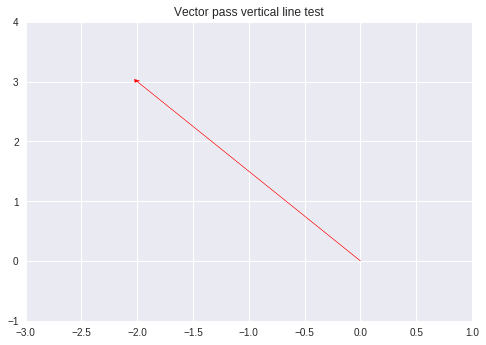

In [4]:
a = [-2, 3]
plt.arrow(0,0, a[0], a[1],head_width=.05, head_length=0.05, color ='red')

plt.xlim(-3,1)          
plt.ylim(-1,4)
plt.title("Vector pass vertical line test")
plt.show()

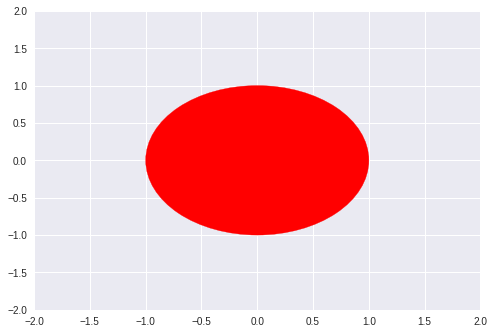

In [8]:
b=plt.Circle((0,0),1,color='r')
plt.xlim(-2,2)          
plt.ylim(-2,2)
plt.gcf().gca().add_artist(b)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function has only 1 output for a single input, so a graph to not pass the verticle line test means that there are multiple outputs for a single input. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

None of these relations are functions, as there are multiple outputs for a single input in each or there is the same output for different inputs. 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

m has 3 dimensions for domain and 3 dimensions for range 

n has 4 dimensions for domain and 2 dimensions for range

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

You can map to a higher dimension, such as f(x) = (x, x^2)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [13]:
px1_vector = np.array([1, 3])
px2_vector = np.array([2, -1])
px12 = np.array([[1, 3], [2, -1]])
unitx = np.array([1, 0])
unity = np.array([0, 1])

p1 = px1_vector * unitx
p2 = px2_vector * unity
#print(p1, p2)

trans = np.array([[1, 0], [0, -1]])
print(trans)

[[ 1  0]
 [ 0 -1]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector is a vector that doe snot change positionally after a calculation. 

An eigenvalue is the length of the aigenvector. 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Humans are not able to visualize(or conceputualize) many dimensions, and we are not able to graph beyond 3-4 dimensions easily.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5 times the observations than parameters.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'],header=0)

In [15]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['species']].values
x = StandardScaler().fit_transform(x)

print(x[0:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])
principalDf.head()

,PCA1,PCA2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [21]:
dffull = pd.concat([principalDf, df[['species']]], axis = 1)
dffull.head()

,PCA1,PCA2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


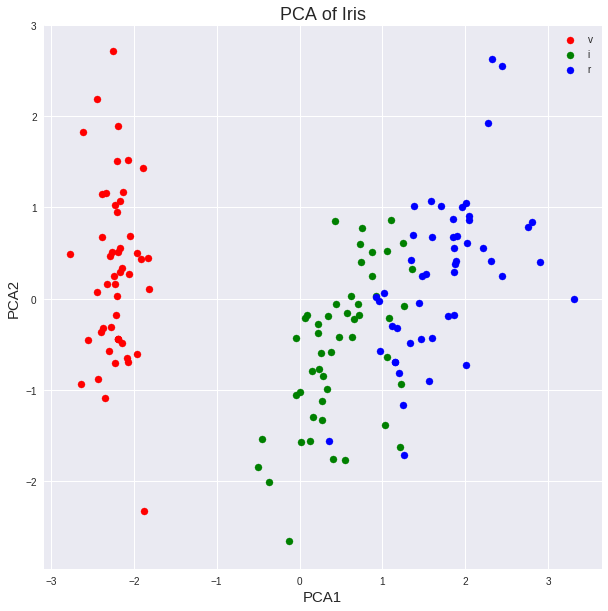

In [28]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('PCA of Iris', fontsize = 18)
species = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for species, color in zip(species,colors):
    index = dffull['species'] == species
    ax.scatter(dffull.loc[index, 'PCA1']
               , dffull.loc[index, 'PCA2']
               , c = color
               , s = 50)
ax.legend(species);

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)